In [25]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)  # Figure size for inline display
import os

In [2]:
from pynx.ptycho.runner.id01 import PtychoRunnerScanID01, params
print('Import OK')

gpyfft version: 0.7.0
Using SILX for spec access!
Import OK


In [3]:
params['saveprefix']='/users/opid01/edo/ptycho/IHR_20161114/ResultsScan%04d/Run%04d'

In [19]:
params['specfile']='/data/id01/inhouse/leake/IHR_20161114/spec/20161115_E16088.spec'
params['scan']=18
params['imgname']='/data/id01/inhouse/leake/IHR_20161114/detector/20161115/E16088/data_mpx4_%05d.edf.gz'
params['probe']='60e-6x200e-6,0.13'  # Starting from a simulated probe, here described as gaussian
params['defocus']=211e-6        #Defocus the calculated initial probe by 100 microns
params['detectordistance']=0.7295
params['ptychomotors']='pix,piy,-x,0.358*y'
params['algorithm'] = '20DM'    # Begin with difference map, object only
params['object'] = 'random,0.995,1,0,0.001'
params['verbose'] = 10          # Print every 10 cycles
params['loadmask'] = 'maxipix'  # This masks the maxipix gaps
params['liveplot'] = True       # Liveplot updated at the end of each cell.
params['nrj'] = 8 # edo
params['loadprobe'] = '/users/opid01/edo/ptycho/IHR_20161114/ResultsScan0017/latest.npz'
#params['moduloframe'] =2,0      # Take only half frames (faster, less memory used)

In [20]:
ws = PtychoRunnerScanID01(params, params['scan'])

Ptycho2D: destructing worker threads


In [21]:
ws.load_data()  # Load all frames from a maxipix detector using CXI/HDF5 data


Read scan: 18  spiralscan pix piy 0.09 32 5
SPEC date: Nov 16 23:14:39 2016 -> 2016-11-16T23:14:39+0100  1479334479
Reading frames: 0 20 

Time to read all frames:  1.0s [ 8.99 Mpixel/s]


In [22]:
ws.center_crop_data()  # Auto-crop the data
ws.prepare()  # This will prepare the initial object

Loaded MASK from:  maxipix
Initialized mask with 6156 ( 2.312%) bad pixels
Center of diffraction: X=240.38 Y=183.36
Largest prime number acceptable for FFT size: 13


/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


E= 8.000keV, zdetector= 0.730m, pixel size= 55.00um, pixel size(object)=   5.6nm
Using random object type with amplitude range:  0.99- 1.00 and phase range:  0.00- 0.00
1 1.0132931688311688e-08 5.647248251748253e-09 False
RESCALING by factor  1.79, pixel sizes: 1.013293e-08 -> 5.647248e-09
Computing FFT speed for all available GPU:
                 GeForce GTX TITAN X [platform: NVIDIA CUDA]: GPU mem: 12287.81Mb [max alloc.:  3071.95Mb],  145.18 Gflop/s (FFT shape: (16, 364, 364) )
####################  WARNING: given GPU not found  ####################
No GPU given, or listed ones not available. Auto-selecting:  ['GeForce GTX TITAN X']


In [23]:
ws.run()  # Run the optimization,as defined in params['algorithm']


 #################################################################################################### 
# 
#         Run: 1
#
 ####################################################################################################
Using double precision for simulation.
Updating defaults values for object.
Simulating object: random
Making obj: (400, 456) 400 456
Using OpenCL device(s):
   Device: GeForce GTX TITAN X [platform=NVIDIA CUDA] [frame range: 0-33] [FFT speed:   144.72Gflop/s]
Number of frames is not a multiple of 16, adding 15 null frames
Pure FFT performance[nz=16x3, ny=364, nx=364]: dt=0.007154s (2fft => 0.004918s/cycle for 3x3 frames),  151.27 Gflop/s

 #################################################################################################### 
# 
#         Run: 1 , Algorithm: 20DM
#
 ####################################################################################################

## Beginning Difference Map optimisation of:  object

Number of frames is not a mul

/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


DM/o, cycle=   10/20: LLK= 7.1877e+02 [dt/cycle =  0.043s]
DM/o, cycle=   20/20: LLK= 2.2811e+02 [dt/cycle =  0.043s]

 #################################################################################################### 
# 
#         Finished Run: 1, saving obj and probe to: /users/opid01/edo/ptycho/IHR_20161114/ResultsScan0018/Run0001.npz
#
 ####################################################################################################

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   140.70nm(H) x   56.18nm(V)
  FW @20% intensity    :   206.70nm(H) x   83.45nm(V)
  FWHM (statistical)   :    96.66nm


In [24]:
ws.run_algorithm('probe=1,40DM')  # Activate probe optimization, continue difference map


 #################################################################################################### 
# 
#         Run: 1 , Algorithm: probe=1
#
 ####################################################################################################

 #################################################################################################### 
# 
#         Run: 1 , Algorithm: 40DM
#
 ####################################################################################################

## Beginning Difference Map optimisation of:  object probe

Number of frames is not a multiple of 16, adding 15 null frames
DM/o/3p, cycle=    1/40: LLK= 1.0175e+01 [dt/cycle =  0.071s]


/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


DM/o/3p, cycle=   10/40: LLK= 4.3238e+00 [dt/cycle =  0.044s]
DM/o/3p, cycle=   20/40: LLK= 4.1050e+00 [dt/cycle =  0.044s]
DM/o/3p, cycle=   30/40: LLK= 4.1641e+00 [dt/cycle =  0.044s]
DM/o/3p, cycle=   40/40: LLK= 4.0465e+00 [dt/cycle =  0.044s]

 #################################################################################################### 
# 
#         Finished Run: 1, saving obj and probe to: /users/opid01/edo/ptycho/IHR_20161114/ResultsScan0018/Run0001.npz
#
 ####################################################################################################

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   140.24nm(H) x   56.19nm(V)
  FW @20% intensity    :   206.24nm(H) x   83.66nm(V)
  FWHM (statistical)   :    94.04nm



 #################################################################################################### 
# 
#         Run: 1 , Algorithm: 200AP
#
 ####################################################################################################

## Beginning Alternating Projections optimisation of:  object probe

Number of frames is not a multiple of 16, adding 15 null frames
AP/o/3p, cycle=    1/200: LLK= 4.0465e+00 [dt/cycle =  0.034s]
AP/o/3p, cycle=   10/200: LLK= 1.6535e+00 [dt/cycle =  0.031s]
AP/o/3p, cycle=   20/200: LLK= 1.4956e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   30/200: LLK= 1.4242e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   40/200: LLK= 1.3810e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   50/200: LLK= 1.3509e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   60/200: LLK= 1.3281e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   70/200: LLK= 1.3099e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   80/200: LLK= 1.2948e+00 [dt/cycle =  0.030s]
AP/o/3p, cycle=   90/200: LLK= 1.2819e+00 [dt/cycle 

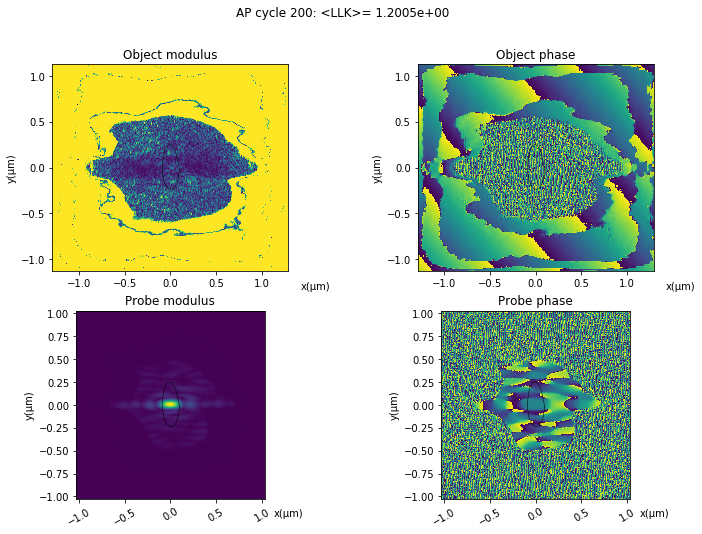

In [26]:
ws.run_algorithm('200AP')

In [30]:
%matplotlib
ws.run_algorithm('200ML')

Using matplotlib backend: Qt4Agg

 #################################################################################################### 
# 
#         Run: 1 , Algorithm: 200ML
#
 ####################################################################################################

## Beginning Maximum Likelihood Conjugate Gradient optimisation of: object probe

Number of frames is not a multiple of 16, adding 15 null frames
ML/o/3p, cycle=    1/200: LLK= 1.0310e+00 [dt/cycle =  0.084s]


/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


ML/o/3p, cycle=   10/200: LLK= 1.0281e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   20/200: LLK= 1.0246e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   30/200: LLK= 1.0219e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   40/200: LLK= 1.0197e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   50/200: LLK= 1.0176e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   60/200: LLK= 1.0159e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   70/200: LLK= 1.0142e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   80/200: LLK= 1.0126e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=   90/200: LLK= 1.0111e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  100/200: LLK= 1.0095e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  110/200: LLK= 1.0080e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  120/200: LLK= 1.0065e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  130/200: LLK= 1.0049e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  140/200: LLK= 1.0031e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  150/200: LLK= 1.0013e+00 [dt/cycle =  0.080s]
ML/o/3p, cycle=  160/200: LLK= 9.9929e-01 [dt/cycle =  


 #################################################################################################### 
# 
#         Run: 1 , Algorithm: Analyze
#
 ####################################################################################################
Propagating probe: 600 580 560 540 520 500 480 460 440 420 400 380 360 340 320 300 280 260 240 220 Warning: exceeding maximum near field distance: z=0.000151 > 0.000075
200 180 160 140 120 100 80 60 40 20 


/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Probe statistics at found focus position (z= -10.9um):
  FWHM (peak intensity):   137.97nm(H) x   56.48nm(V)
  FW @20% intensity    :   204.48nm(H) x   84.20nm(V)
  FWHM (statistical)   :    94.31nm

 #################################################################################################### 
# 
#         Finished Run: 1, saving obj and probe to: /users/opid01/edo/ptycho/IHR_20161114/ResultsScan0018/Run0001.npz
#
 ####################################################################################################

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   138.38nm(H) x   55.70nm(V)
  FW @20% intensity    :   205.44nm(H) x   84.23nm(V)
  FWHM (statistical)   :    93.21nm


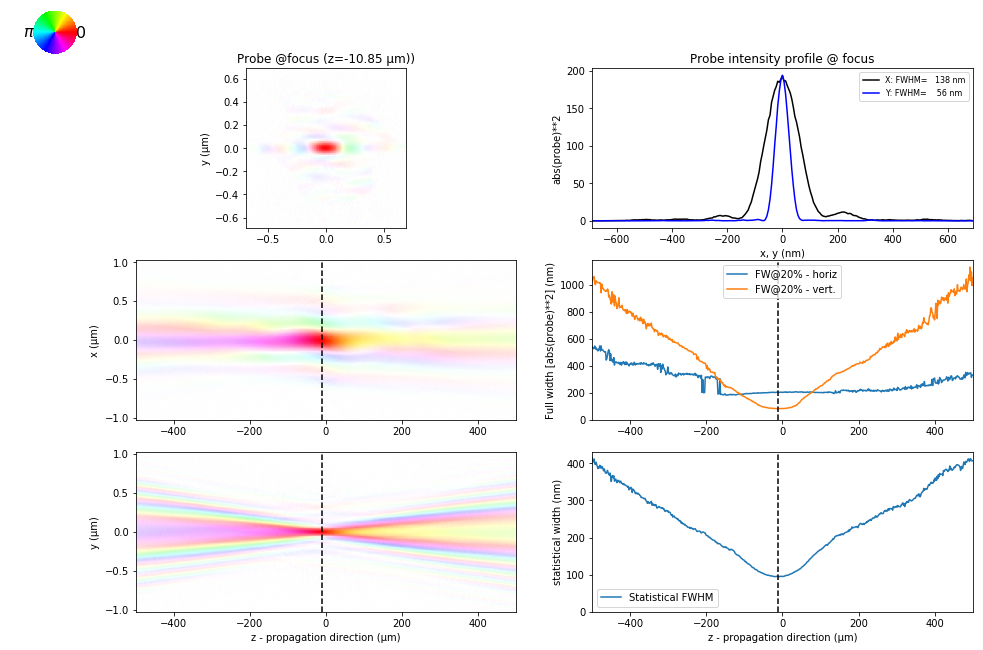

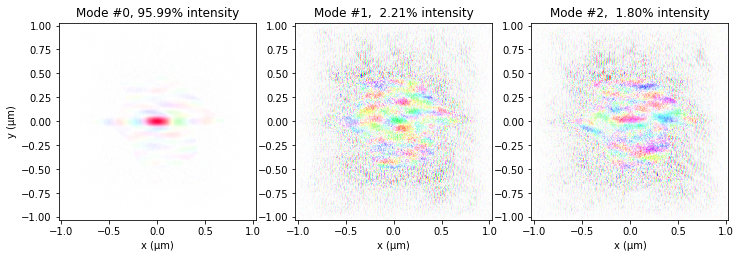

In [28]:
ws.run_algorithm('Analyze')  # Analyze the optimized probe (modes, propagation)


 #################################################################################################### 
# 
#         Run: 5 , Algorithm: nbprobe=3
#
 ####################################################################################################

 #################################################################################################### 
# 
#         Run: 5 , Algorithm: 100AP
#
 ####################################################################################################

## Beginning Alternating Projections optimisation of:  object probe

Number of frames is not a multiple of 16, adding 15 null frames
AP/o/3p, cycle=    1/100: LLK= 2.7072e+00 [dt/cycle =  0.161s]
AP/o/3p, cycle=   10/100: LLK= 1.7574e+00 [dt/cycle =  0.148s]
AP/o/3p, cycle=   20/100: LLK= 1.6783e+00 [dt/cycle =  0.148s]
AP/o/3p, cycle=   30/100: LLK= 1.6295e+00 [dt/cycle =  0.148s]
AP/o/3p, cycle=   40/100: LLK= 1.5950e+00 [dt/cycle =  0.148s]
AP/o/3p, cycle=   50/100: LLK= 1.5691e+00 [dt/cycle =

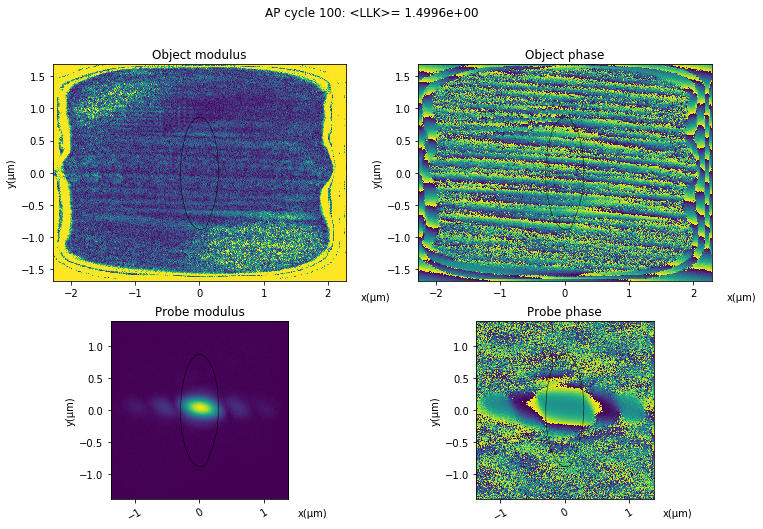

In [15]:
ws.run_algorithm('nbprobe=3,100AP')


 #################################################################################################### 
# 
#         Run: 5 , Algorithm: 100ML
#
 ####################################################################################################

## Beginning Maximum Likelihood Conjugate Gradient optimisation of: object probe

Number of frames is not a multiple of 16, adding 15 null frames
ML/o/3p, cycle=    1/100: LLK= 1.5025e+00 [dt/cycle =  0.404s]
ML/o/3p, cycle=   10/100: LLK= 1.3702e+00 [dt/cycle =  0.397s]
ML/o/3p, cycle=   20/100: LLK= 1.3648e+00 [dt/cycle =  0.397s]
ML/o/3p, cycle=   30/100: LLK= 1.3590e+00 [dt/cycle =  0.397s]
ML/o/3p, cycle=   40/100: LLK= 1.3555e+00 [dt/cycle =  0.397s]
ML/o/3p, cycle=   50/100: LLK= 1.3544e+00 [dt/cycle =  0.399s]
ML/o/3p, cycle=   60/100: LLK= 1.3544e+00 [dt/cycle =  0.398s]
ML/o/3p, cycle=   70/100: LLK= 1.3544e+00 [dt/cycle =  0.398s]
ML/o/3p, cycle=   80/100: LLK= 1.3544e+00 [dt/cycle =  0.399s]
ML/o/3p, cycle=   90/100: LLK= 1.3544e+

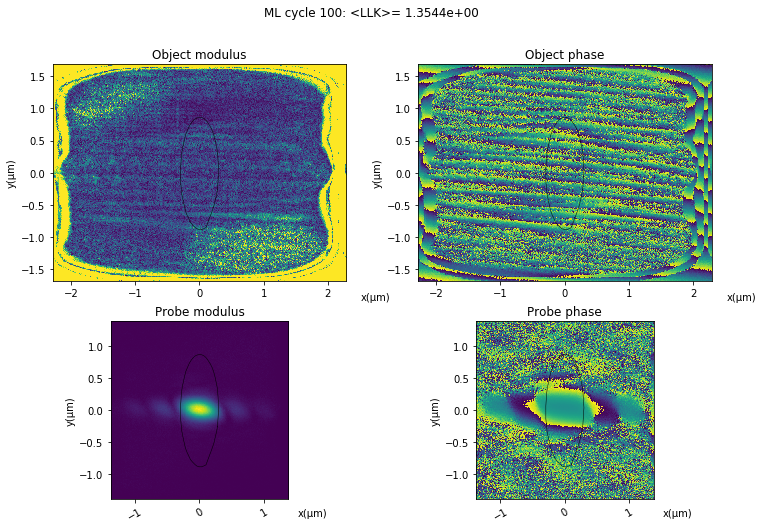

In [16]:
ws.run_algorithm('100ML')

/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


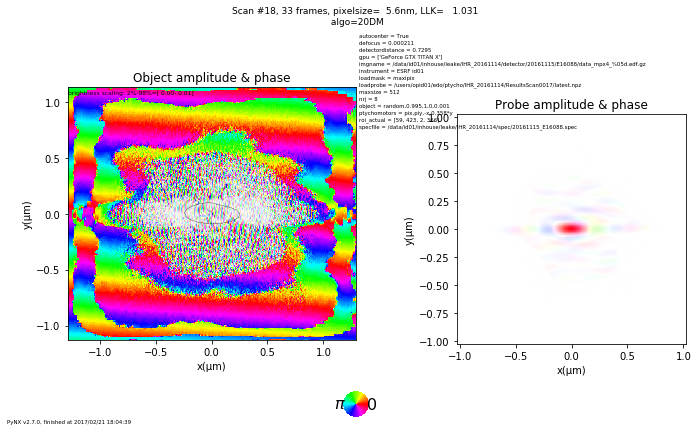

In [29]:
ws.save_plot(ws._run, display_plot=True) # This makes a more elaborate plot than 'liveplot'


 #################################################################################################### 
# 
#         Run: 5 , Algorithm: Analyze
#
 ####################################################################################################
Propagating probe: 600 580 560 540 520 500 480 460 440 420 400 380 360 340 320 300 280 260 240 220 200 180 Warning: exceeding maximum near field distance: z=0.000221 > 0.000110
160 140 120 100 80 60 40 20 


/users/opid01/edo/venv/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Probe statistics at found focus position (z=+211.2um):
  FWHM (peak intensity):   321.27nm(H) x  147.63nm(V)
  FW @20% intensity    :   478.51nm(H) x  221.53nm(V)
  FWHM (statistical)   :   220.56nm

 #################################################################################################### 
# 
#         Finished Run: 5, saving obj and probe to: /users/opid01/edo/ptycho/ResultsScan0015/Run0005.npz
#
 ####################################################################################################

 #################################################################################################### 

Probe statistics at sample position:
  FWHM (peak intensity):   325.71nm(H) x  172.72nm(V)
  FW @20% intensity    :   486.07nm(H) x  268.53nm(V)
  FWHM (statistical)   :   244.17nm


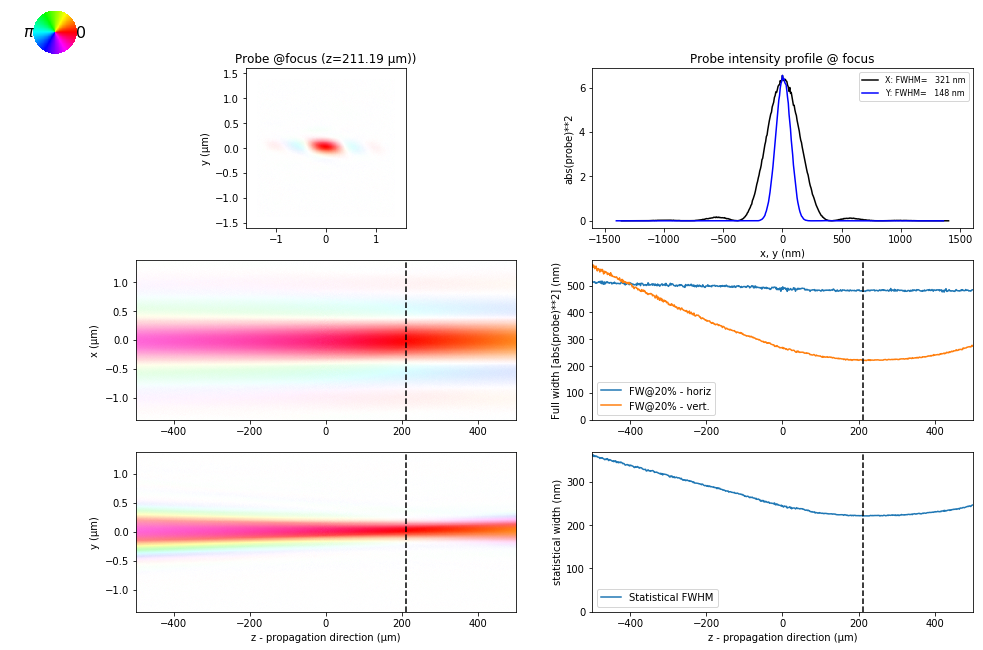

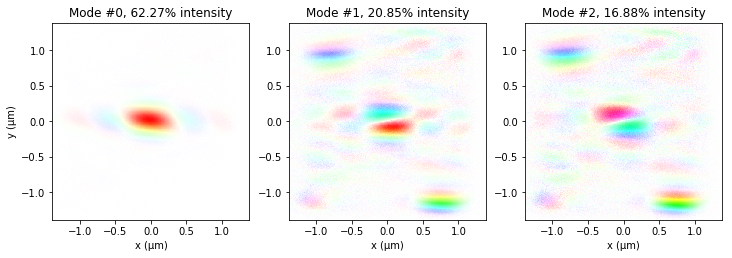

In [18]:
ws.run_algorithm('Analyze')  # Analyze the optimized probe (modes, propagation)

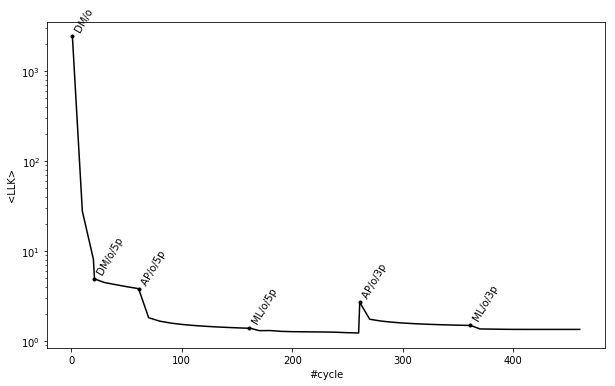

In [19]:
ws.plot_llk_history()